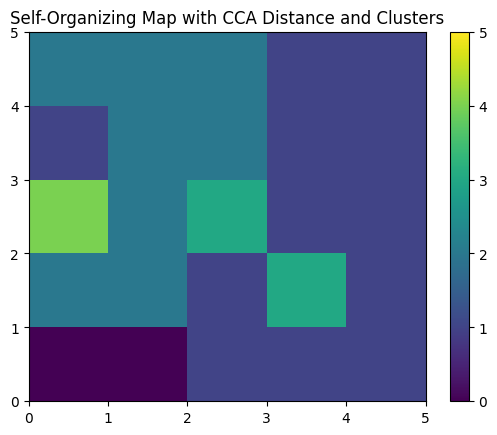

Initial SOM weights:
[[[0.56790309 0.46923666 0.6280866 ]
  [0.54446325 0.6076548  0.53021062]
  [0.34805657 0.63819066 0.65961887]
  [0.47425714 0.49625964 0.4857864 ]
  [0.50540237 0.59081107 0.48569653]]

 [[0.63429413 0.553042   0.59685142]
  [0.47815118 0.59230829 0.50154009]
  [0.48606022 0.58535424 0.4997068 ]
  [0.48829784 0.61834334 0.49297484]
  [0.5653707  0.58829653 0.57215403]]

 [[0.45861074 0.44280832 0.46423269]
  [0.44964205 0.4645348  0.38728064]
  [0.56565993 0.38678272 0.41746379]
  [0.47483165 0.67446497 0.5037879 ]
  [0.46196081 0.64055633 0.50402652]]

 [[0.4808309  0.45783093 0.47283066]
  [0.62771231 0.45112194 0.36739735]
  [0.50232746 0.52764467 0.50156061]
  [0.50014054 0.52994324 0.37518254]
  [0.46548726 0.50481797 0.48614375]]

 [[0.49986481 0.4831013  0.49687465]
  [0.46737305 0.46638622 0.46687842]
  [0.53258741 0.46012474 0.49354207]
  [0.4267894  0.47804563 0.42132159]
  [0.48669877 0.47015011 0.48411996]]]
Trained SOM weights:
[[[0.56790309 0.4692366

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches as patches
from sklearn.cross_decomposition import CCA
from sklearn.cluster import KMeans

# Initialize SOM
def initialize_som(grid_size, input_dim):
    return np.random.random((grid_size, grid_size, input_dim))

# Calculate Canonical Correlation distance
def canonical_correlation_distance(vec1, vec2):
    cca = CCA(n_components=1)
    cca.fit(vec1.reshape(-1, 1), vec2.reshape(-1, 1))
    U, V = cca.transform(vec1.reshape(-1, 1), vec2.reshape(-1, 1))
    return np.linalg.norm(U - V)

# Find the Best Matching Unit (BMU)
def find_bmu(som, input_vec):
    bmu_idx = np.array([0, 0])
    min_dist = np.inf
    for x in range(som.shape[0]):
        for y in range(som.shape[1]):
            dist = canonical_correlation_distance(som[x, y], input_vec)
            if dist < min_dist:
                min_dist = dist
                bmu_idx = np.array([x, y])
    return bmu_idx

# Update the weights
def update_weights(som, input_vec, bmu_idx, learning_rate, radius):
    for x in range(som.shape[0]):
        for y in range(som.shape[1]):
            if np.linalg.norm(np.array([x, y]) - bmu_idx) <= radius:
                som[x, y] += learning_rate * (input_vec - som[x, y])

# Training the SOM
def train_som(som, data, num_iterations, learning_rate, radius):
    for i in range(num_iterations):
        for input_vec in data:
            bmu_idx = find_bmu(som, input_vec)
            update_weights(som, input_vec, bmu_idx, learning_rate, radius)
        learning_rate *= 0.9  # Decay learning rate
        radius *= 0.9  # Decay radius

# Visualize the SOM with clusters
def visualize_som_with_clusters(som, data):
    # Perform clustering on the SOM weights
    som_flat = som.reshape(-1, som.shape[-1])
    kmeans = KMeans(n_clusters=5).fit(som_flat)
    labels = kmeans.labels_.reshape(som.shape[:2])

    fig, ax = plt.subplots()
    ax.set_xlim((0, som.shape[0]))
    ax.set_ylim((0, som.shape[1]))
    cmap = plt.get_cmap('viridis')

    for x in range(som.shape[0]):
        for y in range(som.shape[1]):
            color = cmap(labels[x, y] / 5.0)  # Normalize label to [0, 1] for colormap
            ax.add_patch(patches.Rectangle((x, y), 1, 1, facecolor=color, edgecolor='none'))

    # Add color bar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=5))
    sm.set_array([])
    plt.colorbar(sm, ax=ax)

    plt.title('Self-Organizing Map with CCA Distance and Clusters')
    plt.show()

# Example usage
grid_size = 5  # Reduced grid size
input_dim = 3
som = initialize_som(grid_size, input_dim)
data = np.random.random((50, input_dim))  # Smaller dataset
train_som(som, data, num_iterations=50, learning_rate=0.1, radius=3)  # Fewer iterations
visualize_som_with_clusters(som, data)

print("Initial SOM weights:")
print(som)

print("Trained SOM weights:")
print(som)


In [6]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import euclidean_distances

# Sample data
X = np.array([[1, 2], [2, 2], [2, 3], [8, 7], [8, 8], [25, 80]])

# Using Euclidean distance
dbscan_euclidean = DBSCAN(eps=3, min_samples=2, metric='euclidean')
labels_euclidean = dbscan_euclidean.fit_predict(X)
print(labels_euclidean)  # Output: cluster labels

# Using a custom distance metric (e.g., Manhattan distance)
def manhattan_distance(x, y):
    return np.sum(np.abs(x - y))

dbscan_manhattan = DBSCAN(eps=3, min_samples=2, metric=manhattan_distance)
labels_manhattan = dbscan_manhattan.fit_predict(X)
print(labels_manhattan)  # Output: cluster labels


[ 0  0  0  1  1 -1]
[ 0  0  0  1  1 -1]


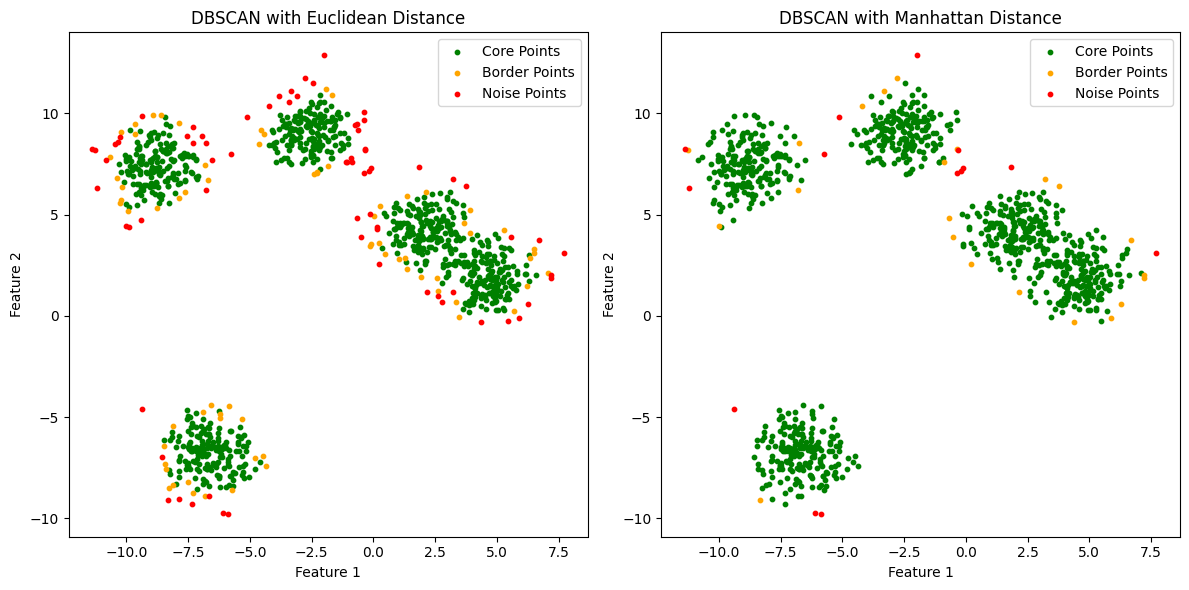

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# Generate a larger dataset
n_samples = 1000
X, _ = make_blobs(n_samples=n_samples, centers=5, cluster_std=1.0, random_state=42)

# Using Euclidean distance
dbscan_euclidean = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
labels_euclidean = dbscan_euclidean.fit_predict(X)

# Using a custom distance metric (e.g., Manhattan distance)
def manhattan_distance(x, y):
    return np.sum(np.abs(x - y))

dbscan_manhattan = DBSCAN(eps=1.0, min_samples=5, metric=manhattan_distance)
labels_manhattan = dbscan_manhattan.fit_predict(X)

# Define colors for core, border, and noise points
def get_point_types(labels, dbscan):
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[dbscan.core_sample_indices_] = True

    noise_mask = labels == -1
    border_mask = ~(core_samples_mask | noise_mask)

    return core_samples_mask, border_mask, noise_mask

# Get point types for Euclidean
core_samples_euclidean, border_samples_euclidean, noise_samples_euclidean = get_point_types(labels_euclidean, dbscan_euclidean)

# Get point types for Manhattan
core_samples_manhattan, border_samples_manhattan, noise_samples_manhattan = get_point_types(labels_manhattan, dbscan_manhattan)

# Plotting the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Euclidean distance plot
ax1.scatter(X[core_samples_euclidean, 0], X[core_samples_euclidean, 1], c='green', label='Core Points', s=10) # Use correct indexing to get x and y coordinates of the core points
ax1.scatter(X[border_samples_euclidean, 0], X[border_samples_euclidean, 1], c='orange', label='Border Points', s=10) # Use correct indexing to get x and y coordinates of the border points
ax1.scatter(X[noise_samples_euclidean, 0], X[noise_samples_euclidean, 1], c='red', label='Noise Points', s=10) # Use correct indexing to get x and y coordinates of the noise points

ax1.set_title('DBSCAN with Euclidean Distance')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.legend()

# Manhattan distance plot
ax2.scatter(X[core_samples_manhattan, 0], X[core_samples_manhattan, 1], c='green', label='Core Points', s=10) # Use correct indexing to get x and y coordinates of the core points
ax2.scatter(X[border_samples_manhattan, 0], X[border_samples_manhattan, 1], c='orange', label='Border Points', s=10) # Use correct indexing to get x and y coordinates of the border points
ax2.scatter(X[noise_samples_manhattan, 0], X[noise_samples_manhattan, 1], c='red', label='Noise Points', s=10) # Use correct indexing to get x and y coordinates of the noise points
ax2.set_title('DBSCAN with Manhattan Distance')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.legend()

plt.tight_layout()
plt.show()


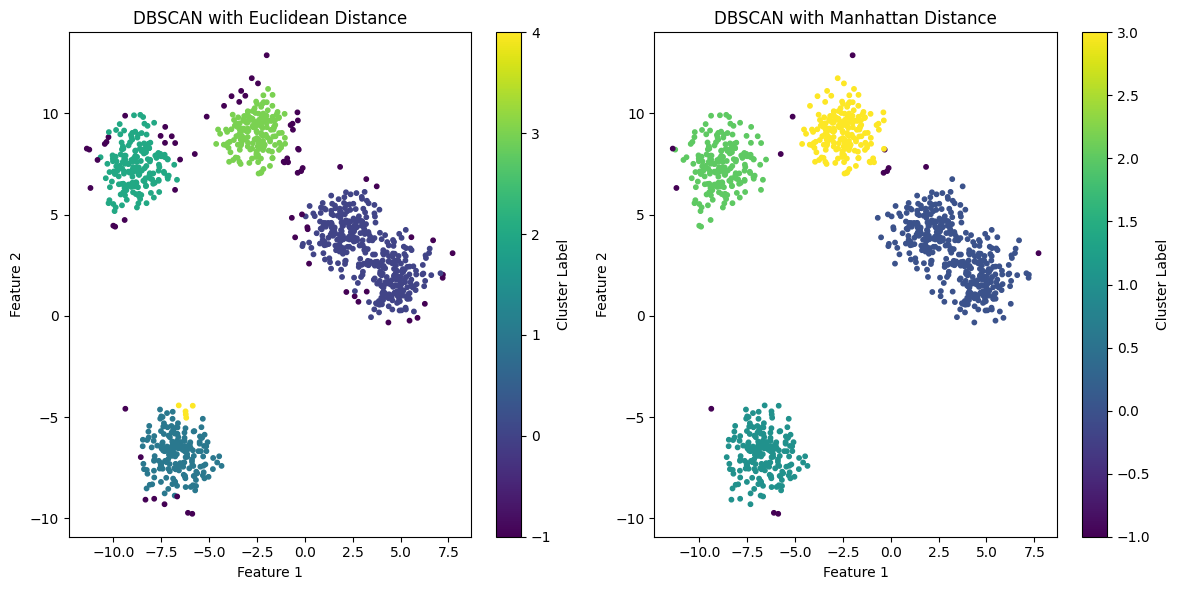

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# Generate a larger dataset
n_samples = 1000
X, _ = make_blobs(n_samples=n_samples, centers=5, cluster_std=1.0, random_state=42)

# Using Euclidean distance
dbscan_euclidean = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
labels_euclidean = dbscan_euclidean.fit_predict(X)

# Using a custom distance metric (e.g., Manhattan distance)
def manhattan_distance(x, y):
    return np.sum(np.abs(x - y))

dbscan_manhattan = DBSCAN(eps=1.0, min_samples=5, metric=manhattan_distance)
labels_manhattan = dbscan_manhattan.fit_predict(X)

# Plotting the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Euclidean distance plot
scatter1 = ax1.scatter(X[:, 0], X[:, 1], c=labels_euclidean, cmap='viridis', marker='o', s=10)
ax1.set_title('DBSCAN with Euclidean Distance')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

# Manhattan distance plot
scatter2 = ax2.scatter(X[:, 0], X[:, 1], c=labels_manhattan, cmap='viridis', marker='o', s=10)
ax2.set_title('DBSCAN with Manhattan Distance')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

plt.colorbar(scatter1, ax=ax1, label='Cluster Label')
plt.colorbar(scatter2, ax=ax2, label='Cluster Label')
plt.tight_layout()
plt.show()


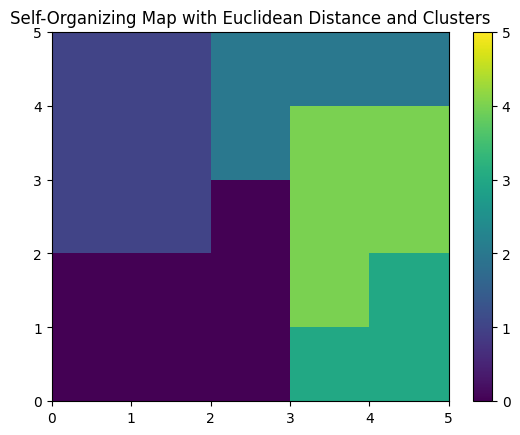

Initial SOM weights:
[[[0.84909351 0.20137435 0.30799941]
  [0.86033605 0.4603807  0.46831722]
  [0.89646351 0.72807811 0.54936784]
  [0.83570834 0.81191805 0.78010526]
  [0.68951103 0.87348921 0.86988504]]

 [[0.80839667 0.32349624 0.19020398]
  [0.72497839 0.47125507 0.34406631]
  [0.81206052 0.53922099 0.65261574]
  [0.65449463 0.72565326 0.81130933]
  [0.4944755  0.83618121 0.88599493]]

 [[0.60991346 0.38432471 0.15398978]
  [0.53881657 0.3470701  0.18849008]
  [0.50814133 0.47857112 0.332063  ]
  [0.35058276 0.60052247 0.73987694]
  [0.22013442 0.82106238 0.73225092]]

 [[0.31001176 0.1146154  0.44894277]
  [0.35156719 0.1594723  0.16837233]
  [0.31845176 0.2932584  0.15682589]
  [0.23535547 0.61942455 0.32347248]
  [0.18506855 0.8725072  0.48350998]]

 [[0.28400458 0.07576558 0.65886502]
  [0.27204261 0.21720601 0.42277412]
  [0.18941811 0.37505002 0.15450057]
  [0.16842021 0.56998191 0.13553033]
  [0.35901463 0.85430217 0.23023938]]]
Trained SOM weights:
[[[0.84909351 0.2013743

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches as patches
from sklearn.cluster import KMeans

# Initialize SOM
def initialize_som(grid_size, input_dim):
    return np.random.random((grid_size, grid_size, input_dim))

# Calculate Euclidean distance
def euclidean_distance(vec1, vec2):
    return np.linalg.norm(vec1 - vec2)

# Find the Best Matching Unit (BMU)
def find_bmu(som, input_vec):
    bmu_idx = np.array([0, 0])
    min_dist = np.inf
    for x in range(som.shape[0]):
        for y in range(som.shape[1]):
            dist = euclidean_distance(som[x, y], input_vec)
            if dist < min_dist:
                min_dist = dist
                bmu_idx = np.array([x, y])
    return bmu_idx

# Update the weights
def update_weights(som, input_vec, bmu_idx, learning_rate, radius):
    for x in range(som.shape[0]):
        for y in range(som.shape[1]):
            if np.linalg.norm(np.array([x, y]) - bmu_idx) <= radius:
                som[x, y] += learning_rate * (input_vec - som[x, y])

# Training the SOM
def train_som(som, data, num_iterations, learning_rate, radius):
    for i in range(num_iterations):
        for input_vec in data:
            bmu_idx = find_bmu(som, input_vec)
            update_weights(som, input_vec, bmu_idx, learning_rate, radius)
        learning_rate *= 0.9  # Decay learning rate
        radius *= 0.9  # Decay radius

# Visualize the SOM with clusters
def visualize_som_with_clusters(som):
    # Perform clustering on the SOM weights
    som_flat = som.reshape(-1, som.shape[-1])
    kmeans = KMeans(n_clusters=5).fit(som_flat)
    labels = kmeans.labels_.reshape(som.shape[:2])

    fig, ax = plt.subplots()
    ax.set_xlim((0, som.shape[0]))
    ax.set_ylim((0, som.shape[1]))
    cmap = plt.get_cmap('viridis')

    for x in range(som.shape[0]):
        for y in range(som.shape[1]):
            color = cmap(labels[x, y] / 5.0)  # Normalize label to [0, 1] for colormap
            ax.add_patch(patches.Rectangle((x, y), 1, 1, facecolor=color, edgecolor='none'))

    # Add color bar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=5))
    sm.set_array([])
    plt.colorbar(sm, ax=ax)

    plt.title('Self-Organizing Map with Euclidean Distance and Clusters')
    plt.show()

# Example usage
grid_size = 5  # Reduced grid size
input_dim = 3
som = initialize_som(grid_size, input_dim)
data = np.random.random((50, input_dim))  # Smaller dataset
train_som(som, data, num_iterations=50, learning_rate=0.1, radius=3)  # Fewer iterations
visualize_som_with_clusters(som)

print("Initial SOM weights:")
print(som)

print("Trained SOM weights:")
print(som)
